# **Problem Statement**
Corporate bankruptcies rarely occur suddenly. Financial distress develops gradually through:


*   declining profitability,
*   liquidity stress,
*   cash-flow deterioration,
*   increasing leverage.


The objective of this project is to:
> **Predict bankruptcy and analyze how early warning signals evolve over time.**


# Dataset Description

- **Source**: UCI Machine Learning Repository  
- **Dataset**: Polish Companies Bankruptcy Dataset  
- **Structure**:
  - Separate datasets for **1 to 5 years before bankruptcy**
  - Each instance contains financial ratios
  - Target variable:
    - `1` → Bankrupt
    - `0` → Healthy

 The dataset is **not uploaded** to this repository.  
Please download it directly from UCI:
https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data

# Importing libraries and loading dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff


In [ ]:
data1=arff.loadarff('/content/drive/MyDrive/datasets/polish+companies+bankruptcy+data/1year.arff')
train1= pd.DataFrame(data1[0])
train1.to_csv('output1.csv', index=False)

In [ ]:
data2=arff.loadarff('/content/drive/MyDrive/datasets/polish+companies+bankruptcy+data/2year.arff')
train2=pd.DataFrame(data2[0])
train2.to_csv('output2.csv', index=False)

In [ ]:
data3=arff.loadarff('/content/drive/MyDrive/datasets/polish+companies+bankruptcy+data/3year.arff')
train3=pd.DataFrame(data3[0])
train3.to_csv('output3.csv', index=False)

In [ ]:
data4=arff.loadarff('/content/drive/MyDrive/datasets/polish+companies+bankruptcy+data/4year.arff')
train4=pd.DataFrame(data4[0])
train4.to_csv('output4.csv', index=False)

In [ ]:
data5=arff.loadarff('/content/drive/MyDrive/datasets/polish+companies+bankruptcy+data/5year.arff')
train5=pd.DataFrame(data5[0])
train5.to_csv('output5.csv', index=False)

In [ ]:
new_feature_names = [
    "net profit / total assets",
    "total liabilities / total assets",
    "working capital / total assets",
    "current assets / short-term liabilities",
    "[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365",
    "retained earnings / total assets",
    "EBIT / total assets",
    "book value of equity / total liabilities",
    "sales / total assets",
    "equity / total assets",
    "(gross profit + extraordinary items + financial expenses) / total assets",
    "gross profit / short-term liabilities",
    "(gross profit + depreciation) / sales",
    "(gross profit + interest) / total assets",
    "(total liabilities * 365) / (gross profit + depreciation)",
    "(gross profit + depreciation) / total liabilities",
    "total assets / total liabilities",
    "gross profit / total assets",
    "gross profit / sales",
    "(inventory * 365) / sales",
    "sales (n) / sales (n-1)",
    "profit on operating activities / total assets",
    "net profit / sales",
    "gross profit (in 3 years) / total assets",
    "(equity - share capital) / total assets",
    "(net profit + depreciation) / total liabilities",
    "profit on operating activities / financial expenses",
    "working capital / fixed assets",
    "logarithm of total assets",
    "(total liabilities - cash) / sales",
    "(gross profit + interest) / sales",
    "(current liabilities * 365) / cost of products sold",
    "operating expenses / short-term liabilities",
    "operating expenses / total liabilities",
    "profit on sales / total assets",
    "total sales / total assets",
    "(current assets - inventories) / long-term liabilities",
    "constant capital / total assets",
    "profit on sales / sales",
    "(current assets - inventory - receivables) / short-term liabilities",
    "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "profit on operating activities / sales",
    "rotation receivables + inventory turnover in days",
    "(receivables * 365) / sales",
    "net profit / inventory",
    "(current assets - inventory) / short-term liabilities",
    "(inventory * 365) / cost of products sold",
    "EBITDA (profit on operating activities - depreciation) / total assets",
    "EBITDA (profit on operating activities - depreciation) / sales",
    "current assets / total liabilities",
    "short-term liabilities / total assets",
    "(short-term liabilities * 365) / cost of products sold)",
    "equity / fixed assets",
    "constant capital / fixed assets",
    "working capital",
    "(sales - cost of products sold) / sales",
    "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "total costs / total sales",
    "long-term liabilities / equity",
    "sales / inventory",
    "sales / receivables",
    "(short-term liabilities * 365) / sales",
    "sales / short-term liabilities",
    "sales / fixed assets"
]


rename_dict = {f"Attr{i+1}": new_feature_names[i] for i in range(64)}


train1 = train1.rename(columns=rename_dict)
train2 = train2.rename(columns=rename_dict)
train3 = train3.rename(columns=rename_dict)
train4 = train4.rename(columns=rename_dict)
train5 = train5.rename(columns=rename_dict)


In [ ]:
train1['class'] = train1['class'].astype(str).astype(int)
train2['class'] = train2['class'].astype(str).astype(int)
train3['class'] = train3['class'].astype(str).astype(int)
train4['class'] = train4['class'].astype(str).astype(int)
train5['class'] = train5['class'].astype(str).astype(int)


# Exploratory Data Analysis

## profitibility ratios












In [ ]:
profitability_cols = [
    'net profit / total assets',
    'EBIT / total assets',
    'gross profit / total assets',
    'gross profit / sales',
    'net profit / sales',
    'profit on operating activities / total assets',
    'profit on operating activities / sales',
    'profit on sales / total assets',
    'profit on sales / sales',
    '(gross profit + depreciation) / sales',
    '(gross profit + interest) / total assets',
    '(gross profit + interest) / sales',
    '(gross profit + extraordinary items + financial expenses) / total assets',
    'EBITDA (profit on operating activities - depreciation) / total assets',
    'EBITDA (profit on operating activities - depreciation) / sales'
]


In [ ]:
train1[profitability_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
net profit / total assets,7024.0,0.034660,4.565504,-256.89,0.021182,0.075802,0.160268,94.280
EBIT / total assets,7024.0,0.313876,8.353274,-189.56,0.028023,0.090109,0.188667,453.770
gross profit / total assets,7024.0,0.313876,8.353274,-189.56,0.028023,0.090109,0.188667,453.770
gross profit / sales,7027.0,0.462392,30.646874,-622.06,0.014812,0.049966,0.104500,2156.800
net profit / sales,7027.0,0.423610,29.742101,-634.59,0.011253,0.042097,0.088314,2156.800
profit on operating activities / total assets,7024.0,0.288163,8.337193,-216.80,0.020362,0.087178,0.185175,454.640
profit on operating activities / sales,7027.0,0.263638,27.071123,-701.63,0.011540,0.047783,0.102165,2156.800
profit on sales / total assets,7024.0,0.306880,7.565155,-169.47,0.023120,0.086120,0.189695,445.470
profit on sales / sales,7027.0,0.269342,27.064231,-701.63,0.012786,0.046948,0.103375,2156.500
(gross profit + depreciation) / sales,7027.0,2.093345,159.699448,-607.42,0.038073,0.080830,0.144955,13315.000


*   all of the profitibility ratios as highly skewed (clearly visible from the distribution plots)
* many profitability ratios show large standard deviation
* extreme min/max values
* sales based ratios tend to have more standard deviation that asset based ratios
* financially distressed firms tend to have small features (low sales, shrinking assets etc) resulting in a  highly skewed data

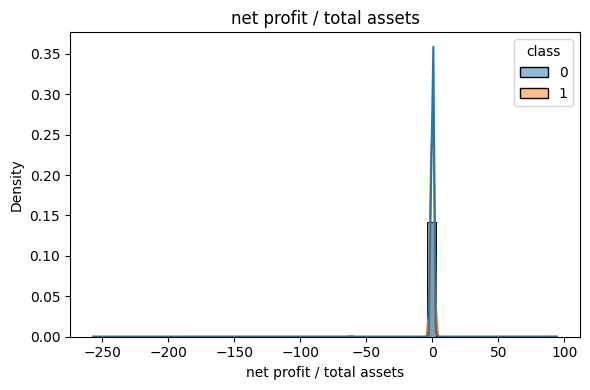

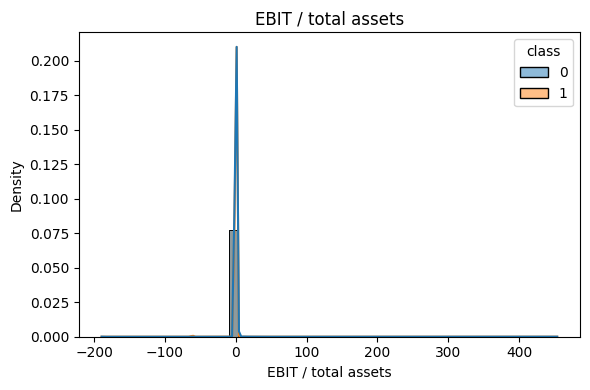

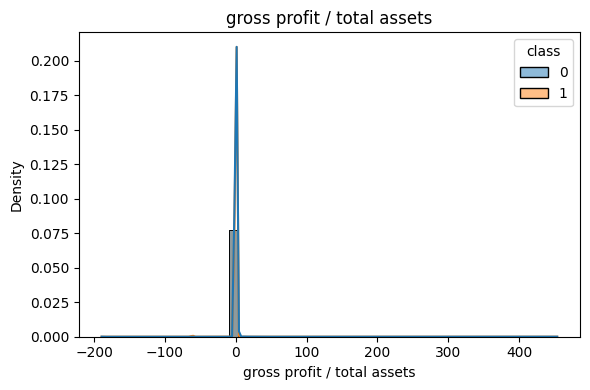

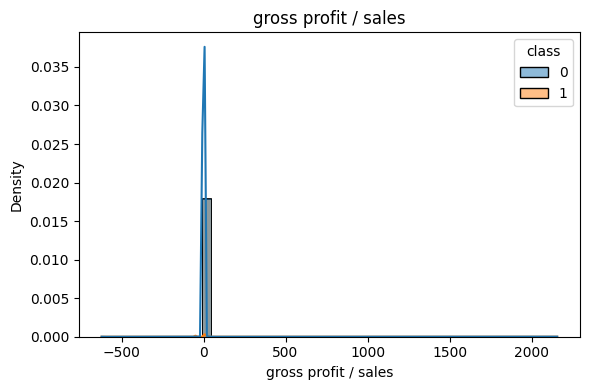

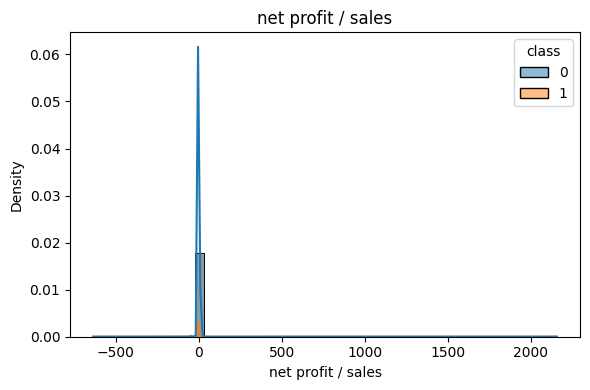

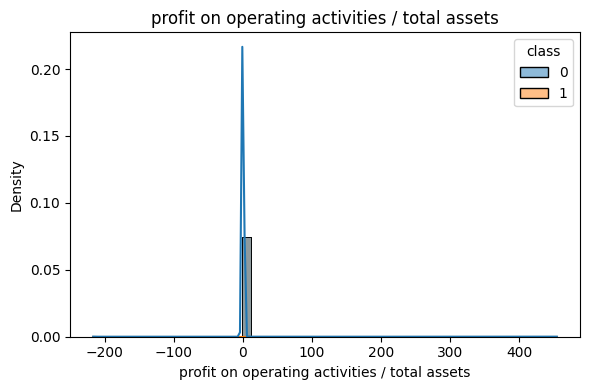

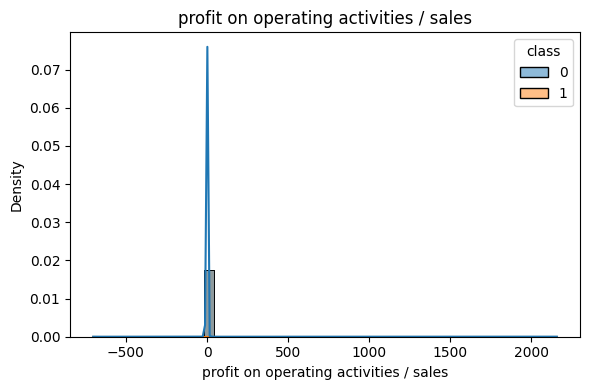

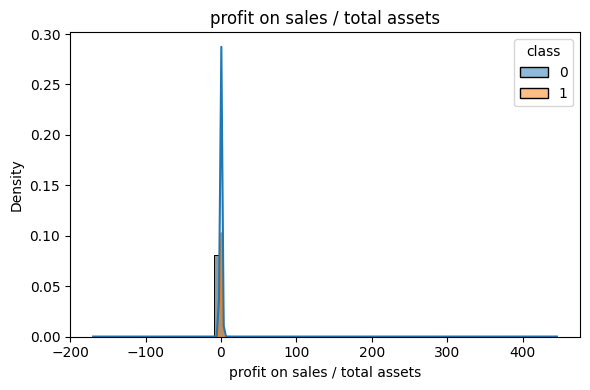

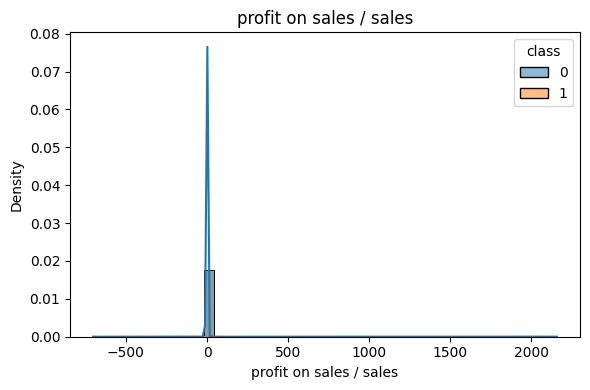

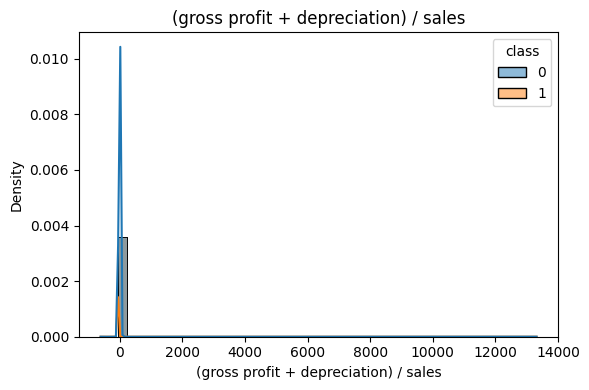

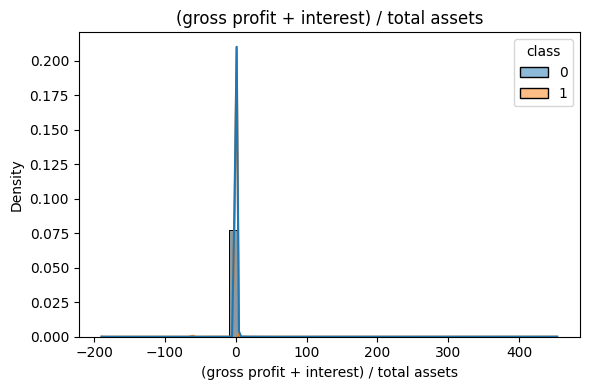

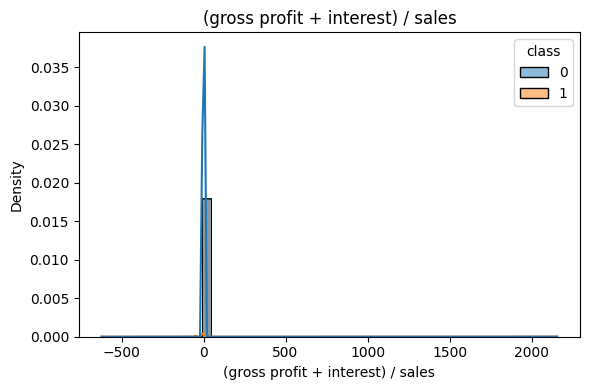

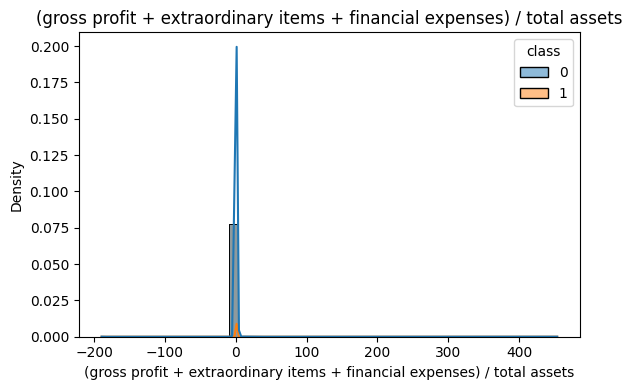

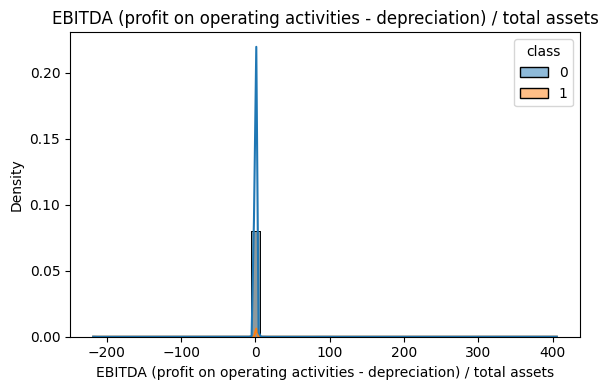

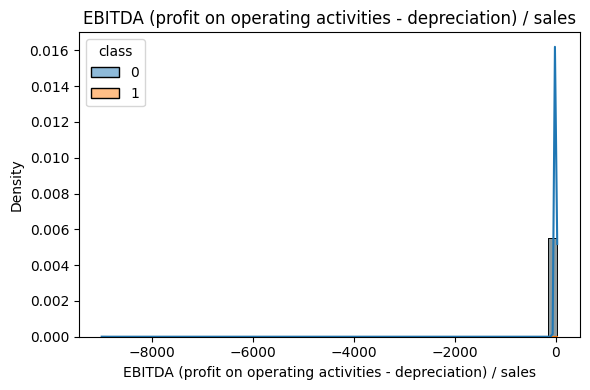

In [ ]:
def plot_profitability_distributions(df, cols):
    for col in cols:
        plt.figure(figsize=(6,4))
        sns.histplot(
            data=df,
            x=col,
            hue="class",
            bins=50,
            kde=True,
            stat="density",
            common_norm=False
        )
        plt.title(col)
        plt.tight_layout()
        plt.show()

plot_profitability_distributions(train1, profitability_cols)

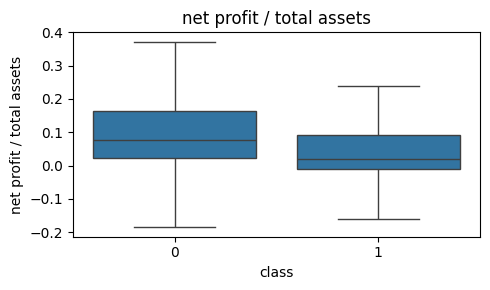

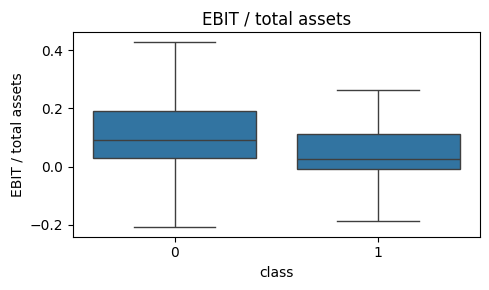

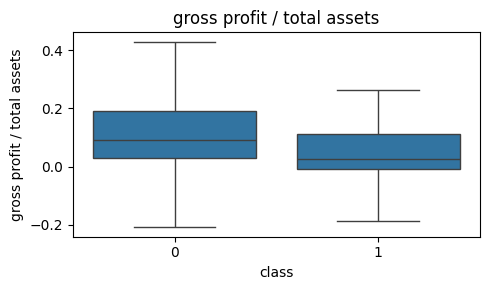

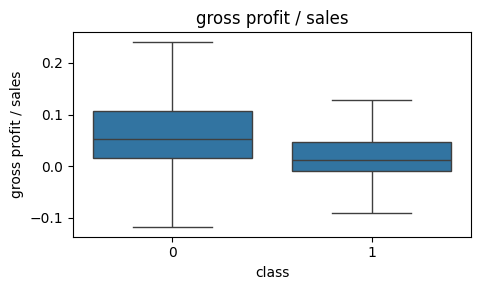

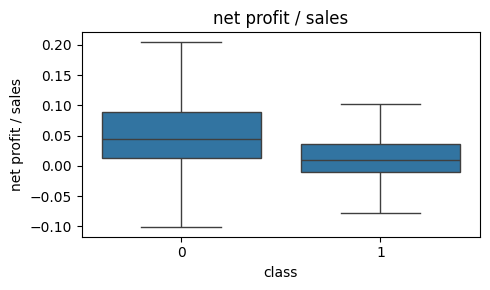

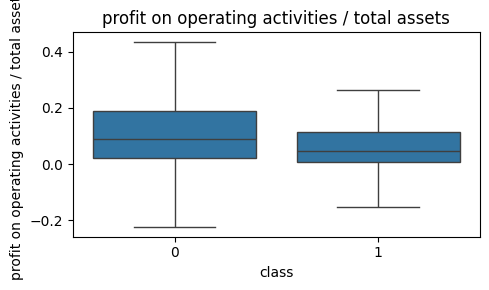

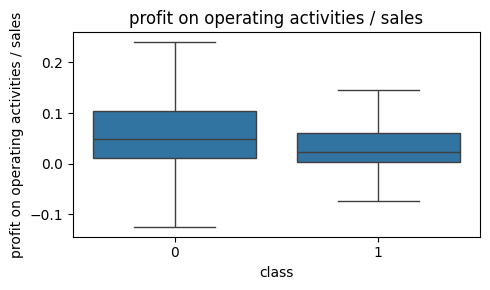

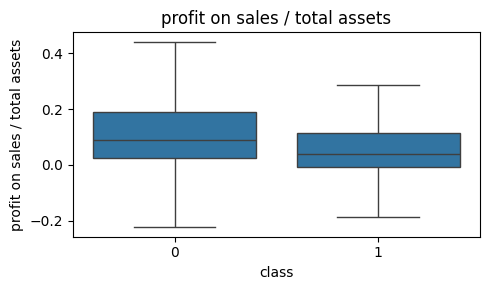

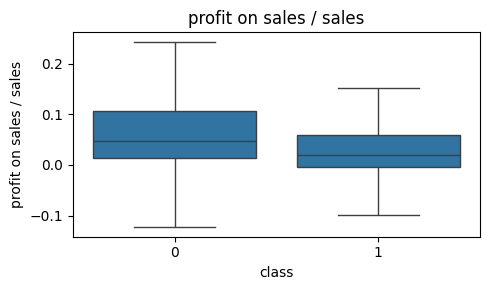

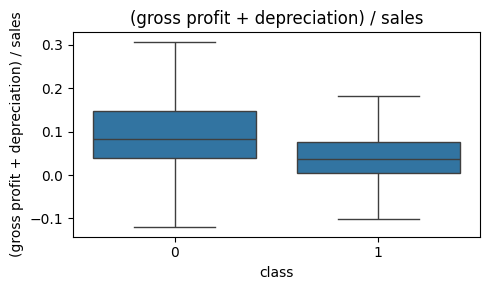

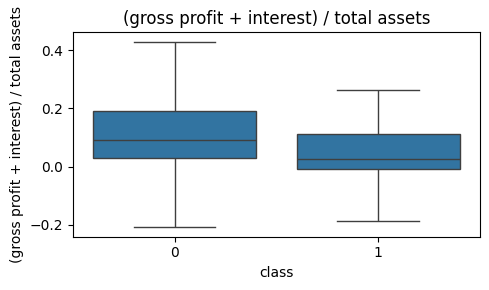

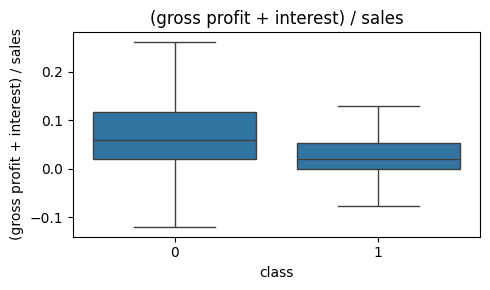

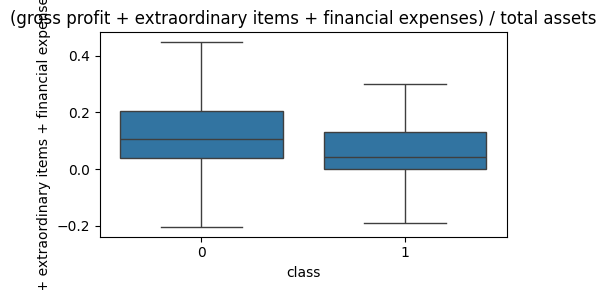

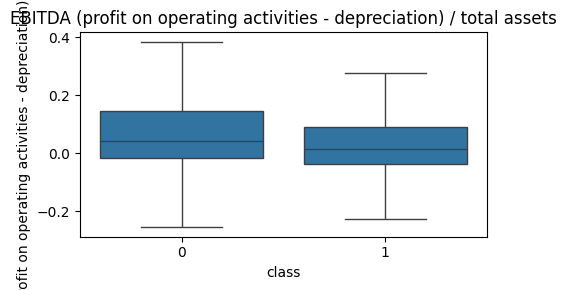

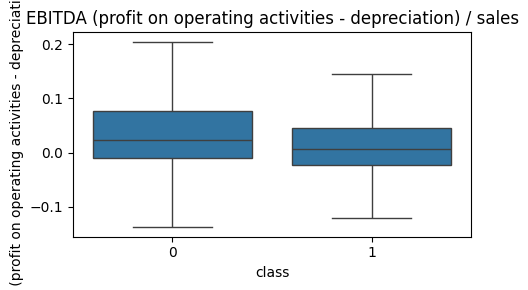

In [ ]:
def plot_profitability_boxplots(df, cols):
    for col in cols:
        plt.figure(figsize=(5,3))
        sns.boxplot(
            data=df,
            x="class",
            y=col,
            showfliers=False
        )
        plt.title(col)
        plt.tight_layout()
        plt.show()

plot_profitability_boxplots(train1, profitability_cols)

In [ ]:
def negative_ratio_analysis(df, cols):
    results = []
    for col in cols:
        neg_bankrupt = (df[df['class'] == 1][col] < 0).mean()
        neg_healthy = (df[df['class'] == 0][col] < 0).mean()
        results.append({
            'ratio': col,
            'bankrupt_neg_%': neg_bankrupt,
            'healthy_neg_%': neg_healthy,
            'difference': neg_bankrupt - neg_healthy
        })
    return pd.DataFrame(results).sort_values(
        by='difference', ascending=False
    )

negativity_table = negative_ratio_analysis(train1, profitability_cols)
negativity_table


,ratio,bankrupt_neg_%,healthy_neg_%,difference
0,net profit / total assets,0.284133,0.113529,0.170604
4,net profit / sales,0.284133,0.113529,0.170604
1,EBIT / total assets,0.276753,0.110864,0.165888
2,gross profit / total assets,0.276753,0.110864,0.165888
3,gross profit / sales,0.276753,0.110864,0.165888
10,(gross profit + interest) / total assets,0.276753,0.110864,0.165888
7,profit on sales / total assets,0.269373,0.109532,0.159840
8,profit on sales / sales,0.269373,0.109532,0.159840
9,(gross profit + depreciation) / sales,0.214022,0.063647,0.150375
11,(gross profit + interest) / sales,0.250923,0.104352,0.146571




*   about 28% of banrupt firms had negative net profit/total assets
*   whereas it is about 11% for healthy firms
*   ebidta based ratios are lower, as ebidta removes depreciation-> smoother
*   





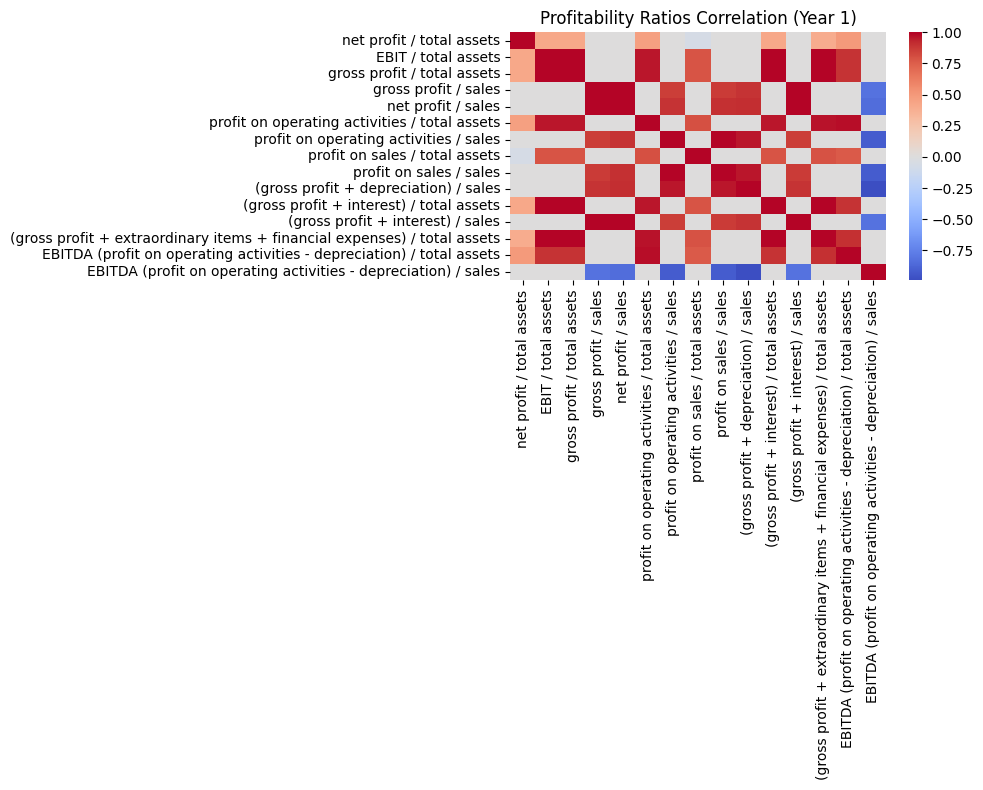

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(
    train1[profitability_cols].corr(),
    cmap='coolwarm',
    center=0
)
plt.title("Profitability Ratios Correlation (Year 1)")
plt.tight_layout()
plt.show()




*   net proit, gross profit and ebidta bassed ratios are highly correlated
*   many of these profitibility ratios give the same information

*   feature reduction required





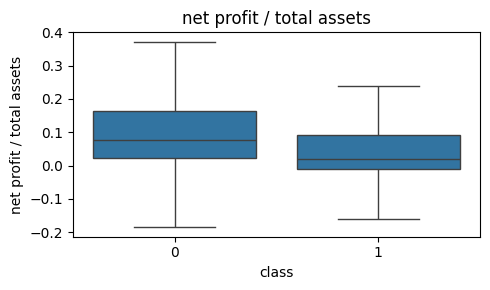

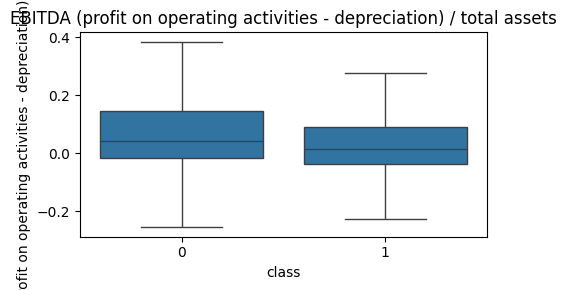

In [ ]:
cols_compare = [
    'net profit / total assets',
    'EBITDA (profit on operating activities - depreciation) / total assets'
]

plot_profitability_boxplots(train1, cols_compare)



net profit/total assets
*   healthy firms have higher median than bankrupt firms which are close to zero or negative
*   overall exists

ebidta/toal assets


*   similar pattern but smoother






In [ ]:
for i, df in enumerate([train1, train2, train3, train4, train5], start=1):
    neg = negative_ratio_analysis(df, cols_compare)
    print(f"\nYear {i}")
    print(neg[['ratio', 'difference']])



Year 1
                                               ratio  difference
0                          net profit / total assets    0.170604
1  EBITDA (profit on operating activities - depre...    0.121736

Year 2
                                               ratio  difference
0                          net profit / total assets    0.095974
1  EBITDA (profit on operating activities - depre...    0.090751

Year 3
                                               ratio  difference
0                          net profit / total assets    0.218847
1  EBITDA (profit on operating activities - depre...    0.112844

Year 4
                                               ratio  difference
0                          net profit / total assets    0.282794
1  EBITDA (profit on operating activities - depre...    0.155672

Year 5
                                               ratio  difference
0                          net profit / total assets    0.449011
1  EBITDA (profit on operating activities - depre.



*   the difference of negative ratios of healthy and bankrupt firms increases year on year




## liquidity ratios

In [ ]:
liquidity_cols = [
    'current assets / short-term liabilities',
    '(current assets - inventory) / short-term liabilities',
    '(current assets - inventory - receivables) / short-term liabilities',
    'current assets / total liabilities',
    '(current assets - inventories) / long-term liabilities',
    'working capital / total assets',
    'working capital / fixed assets'
]


In [ ]:
train1[liquidity_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
current assets / short-term liabilities,6997.0,2.629143,13.257356,0.00,1.063100,1.502000,2.460700,1017.8
(current assets - inventory) / short-term liabilities,6996.0,1.853339,12.882415,-101.26,0.610012,0.964795,1.653700,1017.8
(current assets - inventory - receivables) / short-term liabilities,6997.0,0.826132,12.594535,-101.27,0.052276,0.156790,0.517260,1014.6
current assets / total liabilities,7002.0,2.039821,5.039658,0.00,0.805425,1.187800,1.962200,261.5
(current assets - inventories) / long-term liabilities,4287.0,173.453694,6339.491580,-525.52,1.296500,3.438300,11.393500,398920.0
working capital / total assets,7024.0,0.119969,5.275459,-440.50,0.026968,0.181275,0.362548,1.0
working capital / fixed assets,6993.0,2.702905,27.434030,-490.09,0.050522,0.444730,1.294600,1570.0




*   means are very misleading, very large standard deviation
*   extreme min/max value, min values are very negative and max values are very huge



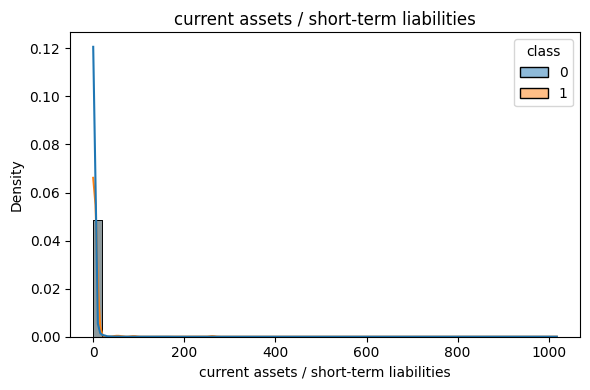

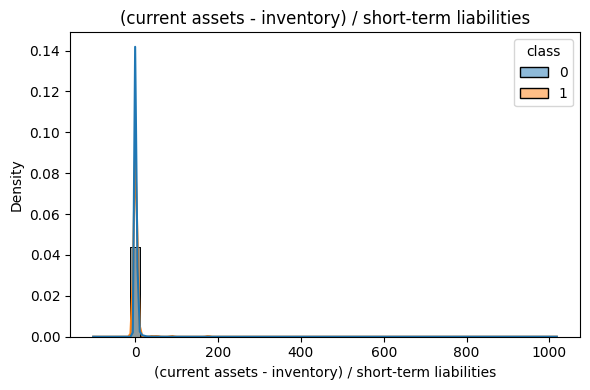

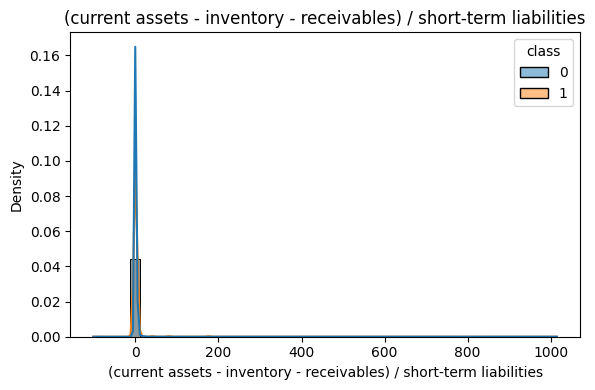

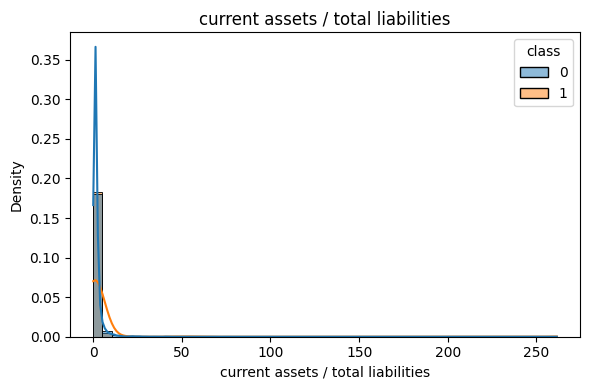

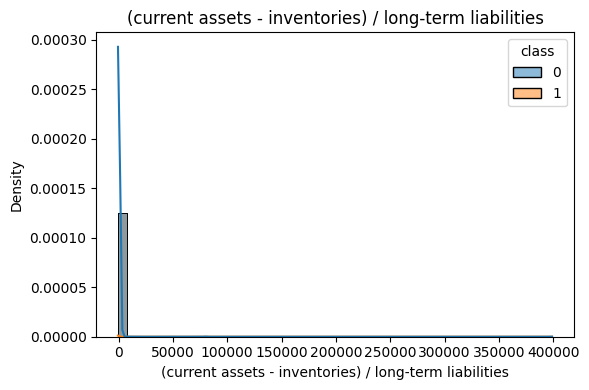

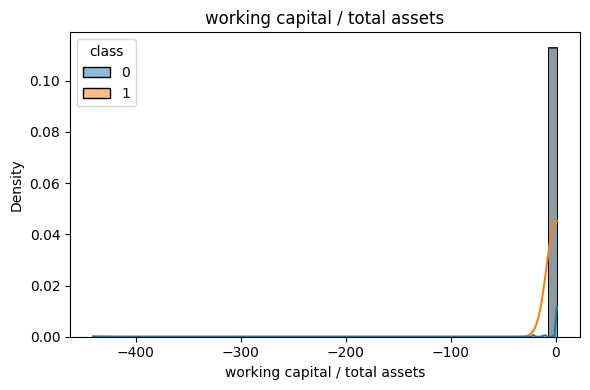

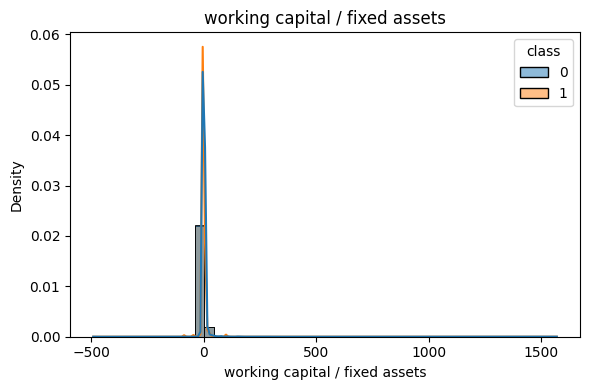

In [ ]:


def plot_liquidity_distributions(df, cols):
    for col in cols:
        plt.figure(figsize=(6,4))
        sns.histplot(
            data=df,
            x=col,
            hue="class",
            bins=50,
            kde=True,
            stat="density",
            common_norm=False
        )
        plt.title(col)
        plt.tight_layout()
        plt.show()

plot_liquidity_distributions(train1, liquidity_cols)


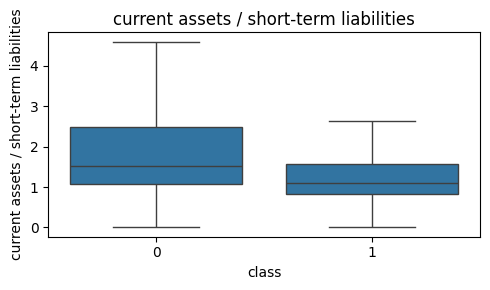

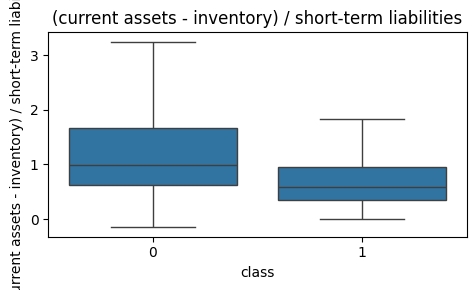

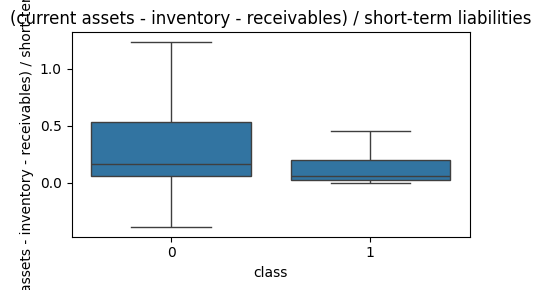

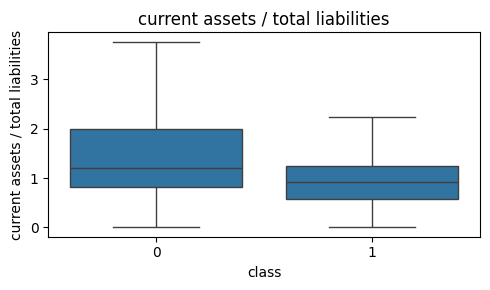

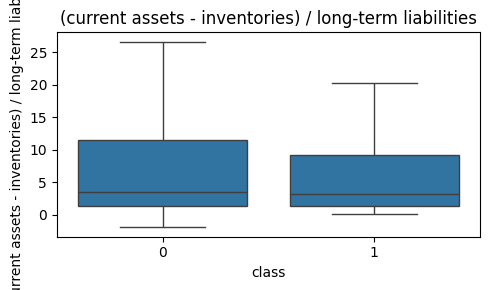

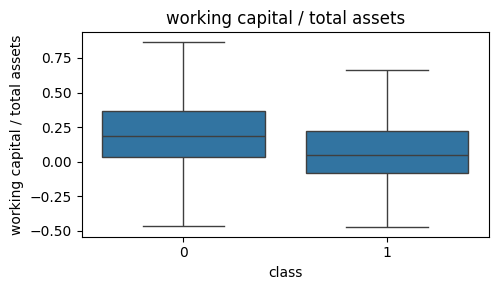

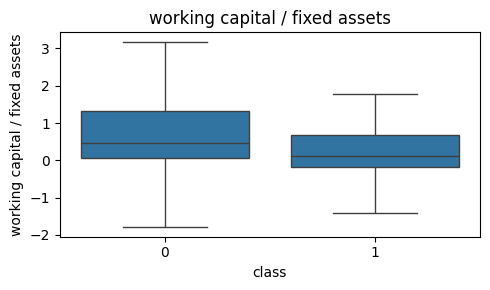

In [ ]:
def plot_liquidity_boxplots(df, cols):
    for col in cols:
        plt.figure(figsize=(5,3))
        sns.boxplot(
            data=df,
            x="class",
            y=col,
            showfliers=False
        )
        plt.title(col)
        plt.tight_layout()
        plt.show()

plot_liquidity_boxplots(train1, liquidity_cols)


In [ ]:
def liquidity_threshold_analysis(df, cols, threshold=1):
    results = []
    for col in cols:
        below_bankrupt = (df[df['class'] == 1][col] < threshold).mean()
        below_healthy = (df[df['class'] == 0][col] < threshold).mean()
        results.append({
            'ratio': col,
            'bankrupt_below_1_%': below_bankrupt,
            'healthy_below_1_%': below_healthy,
            'difference': below_bankrupt - below_healthy
        })
    return pd.DataFrame(results).sort_values(
        by='difference', ascending=False
    )

liquidity_threshold_table = liquidity_threshold_analysis(train1, liquidity_cols)
liquidity_threshold_table


,ratio,bankrupt_below_1_%,healthy_below_1_%,difference
1,(current assets - inventory) / short-term liab...,0.760148,0.507549,0.252599
3,current assets / total liabilities,0.579336,0.370930,0.208406
0,current assets / short-term liabilities,0.398524,0.201007,0.197517
6,working capital / fixed assets,0.778598,0.686797,0.091801
2,(current assets - inventory - receivables) / s...,0.911439,0.854500,0.056939
5,working capital / total assets,1.000000,0.999408,0.000592
4,(current assets - inventories) / long-term lia...,0.118081,0.119597,-0.001516


nearly twice the number of bankrupt companies fail to meet their short term obligations as compared to healthy firms


In [ ]:
def negative_wc_analysis(df):
    wc_cols = [
        'working capital / total assets',
        'working capital / fixed assets'
    ]
    for col in wc_cols:
        print(col)
        print("Bankrupt negative %:",
              (df[df['class'] == 1][col] < 0).mean())
        print("Healthy negative %:",
              (df[df['class'] == 0][col] < 0).mean())
        print()

negative_wc_analysis(train1)


working capital / total assets
Bankrupt negative %: 0.3985239852398524
Healthy negative %: 0.20100651272942568

working capital / fixed assets
Bankrupt negative %: 0.3948339483394834
Healthy negative %: 0.20056246299585553



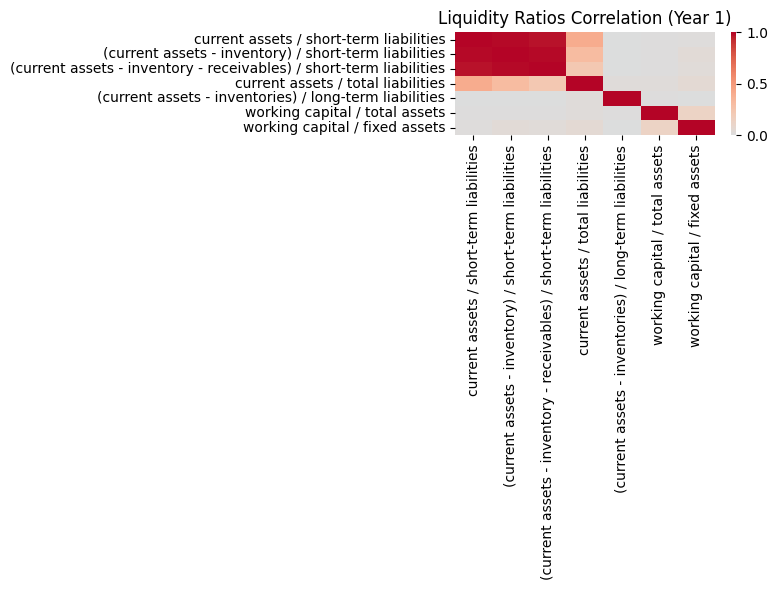

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(
    train1[liquidity_cols].corr(),
    cmap='coolwarm',
    center=0
)
plt.title("Liquidity Ratios Correlation (Year 1)")
plt.tight_layout()
plt.show()


strong correlation among:
  * current ratio variants
  * working capital variants

In [ ]:
for i, df in enumerate([train1, train2, train3, train4, train5], start=1):
    table = liquidity_threshold_analysis(
        df,
        ['current assets / short-term liabilities']
    )
    print(f"\nYear {i}")
    print(table)



Year 1
                                     ratio  bankrupt_below_1_%  \
0  current assets / short-term liabilities            0.398524   

   healthy_below_1_%  difference  
0           0.201007    0.197517  

Year 2
                                     ratio  bankrupt_below_1_%  \
0  current assets / short-term liabilities              0.3725   

   healthy_below_1_%  difference  
0            0.22818     0.14432  

Year 3
                                     ratio  bankrupt_below_1_%  \
0  current assets / short-term liabilities            0.406061   

   healthy_below_1_%  difference  
0           0.218425    0.187635  

Year 4
                                     ratio  bankrupt_below_1_%  \
0  current assets / short-term liabilities            0.448544   

   healthy_below_1_%  difference  
0           0.210413    0.238131  

Year 5
                                     ratio  bankrupt_below_1_%  \
0  current assets / short-term liabilities            0.519512   

   healthy_belo



*   year on year data shows that the difference of current ratio of bankrupt and healthy firms probably because of the increase in liabilities/not much growth in assets for bankrupt firms
*  liquidity stress intensifies over time

*   liquidity deterioration accelerates as firms approach bankruptcy




## cash flow ratios


In [ ]:
cashflow_cols = [
    '(net profit + depreciation) / total liabilities',
    '(gross profit + depreciation) / total liabilities',
    '(total liabilities * 365) / (gross profit + depreciation)',
    'total liabilities / ((profit on operating activities + depreciation) * (12/365))',
    '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365'
]


In [ ]:
train1[cashflow_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
(net profit + depreciation) / total liabilities,7002.0,0.831449,7.781771,-21.793,0.110262,0.276325,0.658733,612.88
(gross profit + depreciation) / total liabilities,7002.0,0.870690,5.595342,-42.322,0.122810,0.311115,0.737823,405.33
(total liabilities * 365) / (gross profit + depreciation),7025.0,1802.696106,83922.323322,-5611900.000,343.540000,926.030000,2166.000000,3599100.00
total liabilities / ((profit on operating activities + depreciation) * (12/365)),6943.0,0.604475,13.834767,-77.791,0.034762,0.088573,0.204055,813.14
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,7019.0,-263.167247,37074.596449,-2722100.000,-44.498000,-5.373900,37.770500,990900.00


* highly skewed data

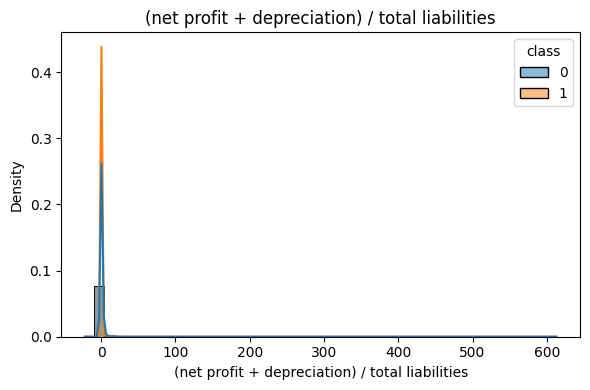

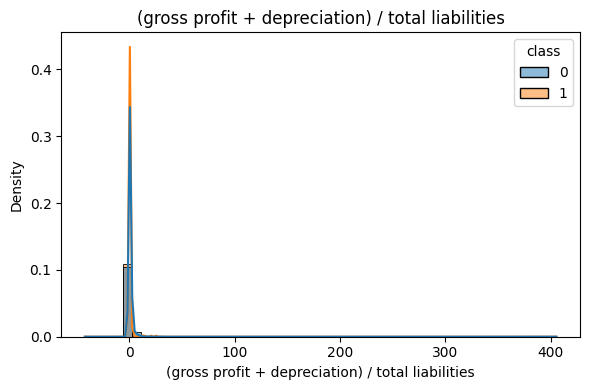

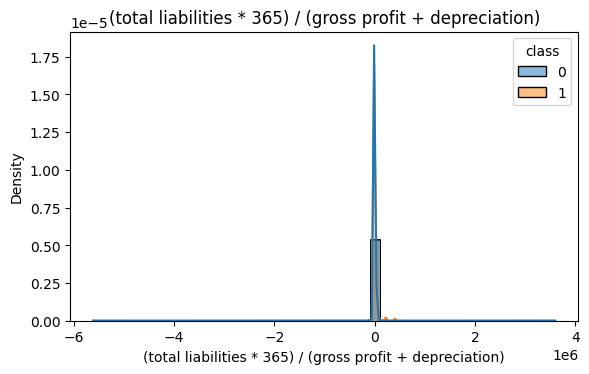

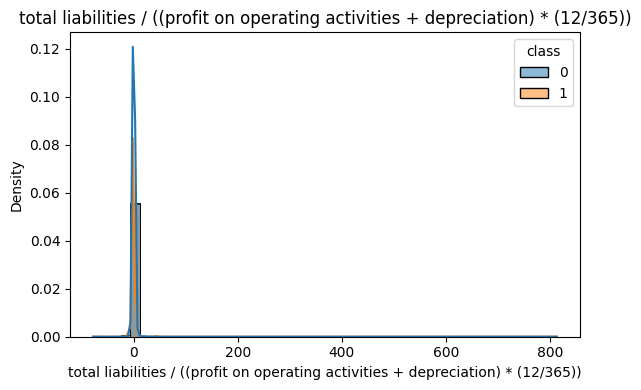

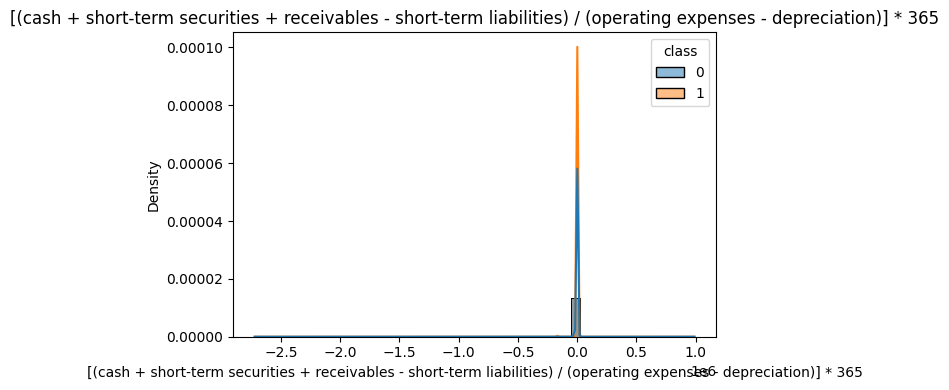

In [ ]:


def plot_cashflow_distributions(df, cols):
    for col in cols:
        plt.figure(figsize=(6,4))
        sns.histplot(
            data=df,
            x=col,
            hue="class",
            bins=50,
            kde=True,
            stat="density",
            common_norm=False
        )
        plt.title(col)
        plt.tight_layout()
        plt.show()

plot_liquidity_distributions(train1, cashflow_cols)


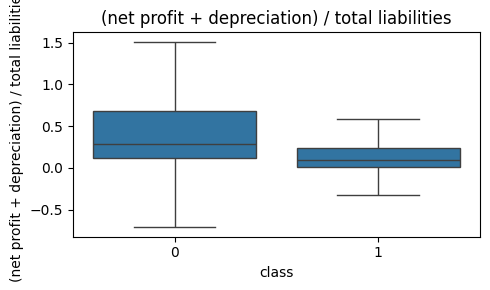

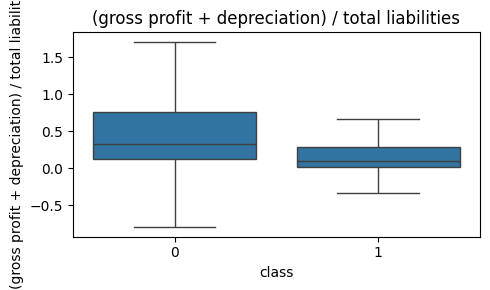

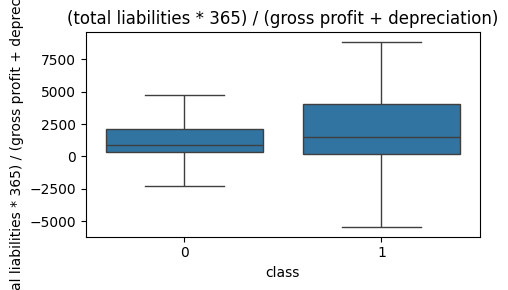

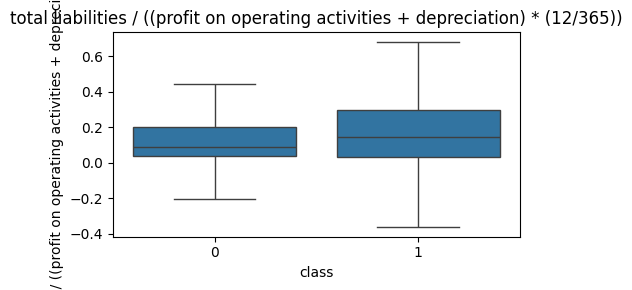

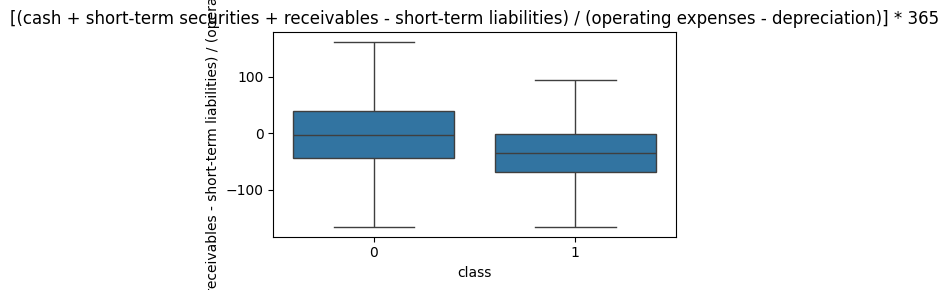

In [ ]:
def plot_cashflow_boxplots(df, cols):
    for col in cols:
        plt.figure(figsize=(5,3))
        sns.boxplot(
            data=df,
            x="class",
            y=col,
            showfliers=False
        )
        plt.title(col)
        plt.tight_layout()
        plt.show()

plot_liquidity_boxplots(train1, cashflow_cols)


In [ ]:
def cashflow_negative_analysis(df, cols):
    results = []
    for col in cols:
        neg_bankrupt = (df[df['class'] == 1][col] < 0).mean()
        neg_healthy = (df[df['class'] == 0][col] < 0).mean()
        results.append({
            'ratio': col,
            'bankrupt_neg_%': neg_bankrupt,
            'healthy_neg_%': neg_healthy,
            'difference': neg_bankrupt - neg_healthy
        })
    return pd.DataFrame(results).sort_values(
        by='difference', ascending=False
    )

cashflow_sign_table = cashflow_negative_analysis(train1, cashflow_cols)
cashflow_sign_table


,ratio,bankrupt_neg_%,healthy_neg_%,difference
4,[(cash + short-term securities + receivables -...,0.756458,0.530787,0.225670
0,(net profit + depreciation) / total liabilities,0.221402,0.064387,0.157015
1,(gross profit + depreciation) / total liabilities,0.214022,0.063647,0.150375
2,(total liabilities * 365) / (gross profit + de...,0.214022,0.063647,0.150375
3,total liabilities / ((profit on operating acti...,0.188192,0.051954,0.136238


* bankrupt firms are more likely to have negative cash flow based ratios
* healthy firms too can have negative ratios of cash flow but less in magnitude

In [ ]:
def cashflow_threshold_analysis(df):
    col = '(total liabilities * 365) / (gross profit + depreciation)'
    return {
        'bankrupt_above_365_%': (df[df['class']==1][col] > 365).mean(),
        'healthy_above_365_%': (df[df['class']==0][col] > 365).mean()
    }

cashflow_threshold_analysis(train1)


{'bankrupt_above_365_%': np.float64(0.7195571955719557),
 'healthy_above_365_%': np.float64(0.7420071047957372)}

* firms already cash-constrained
* Actively burning operating cash
* no short-term buffer

/tmp/ipython-input-1273131135.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


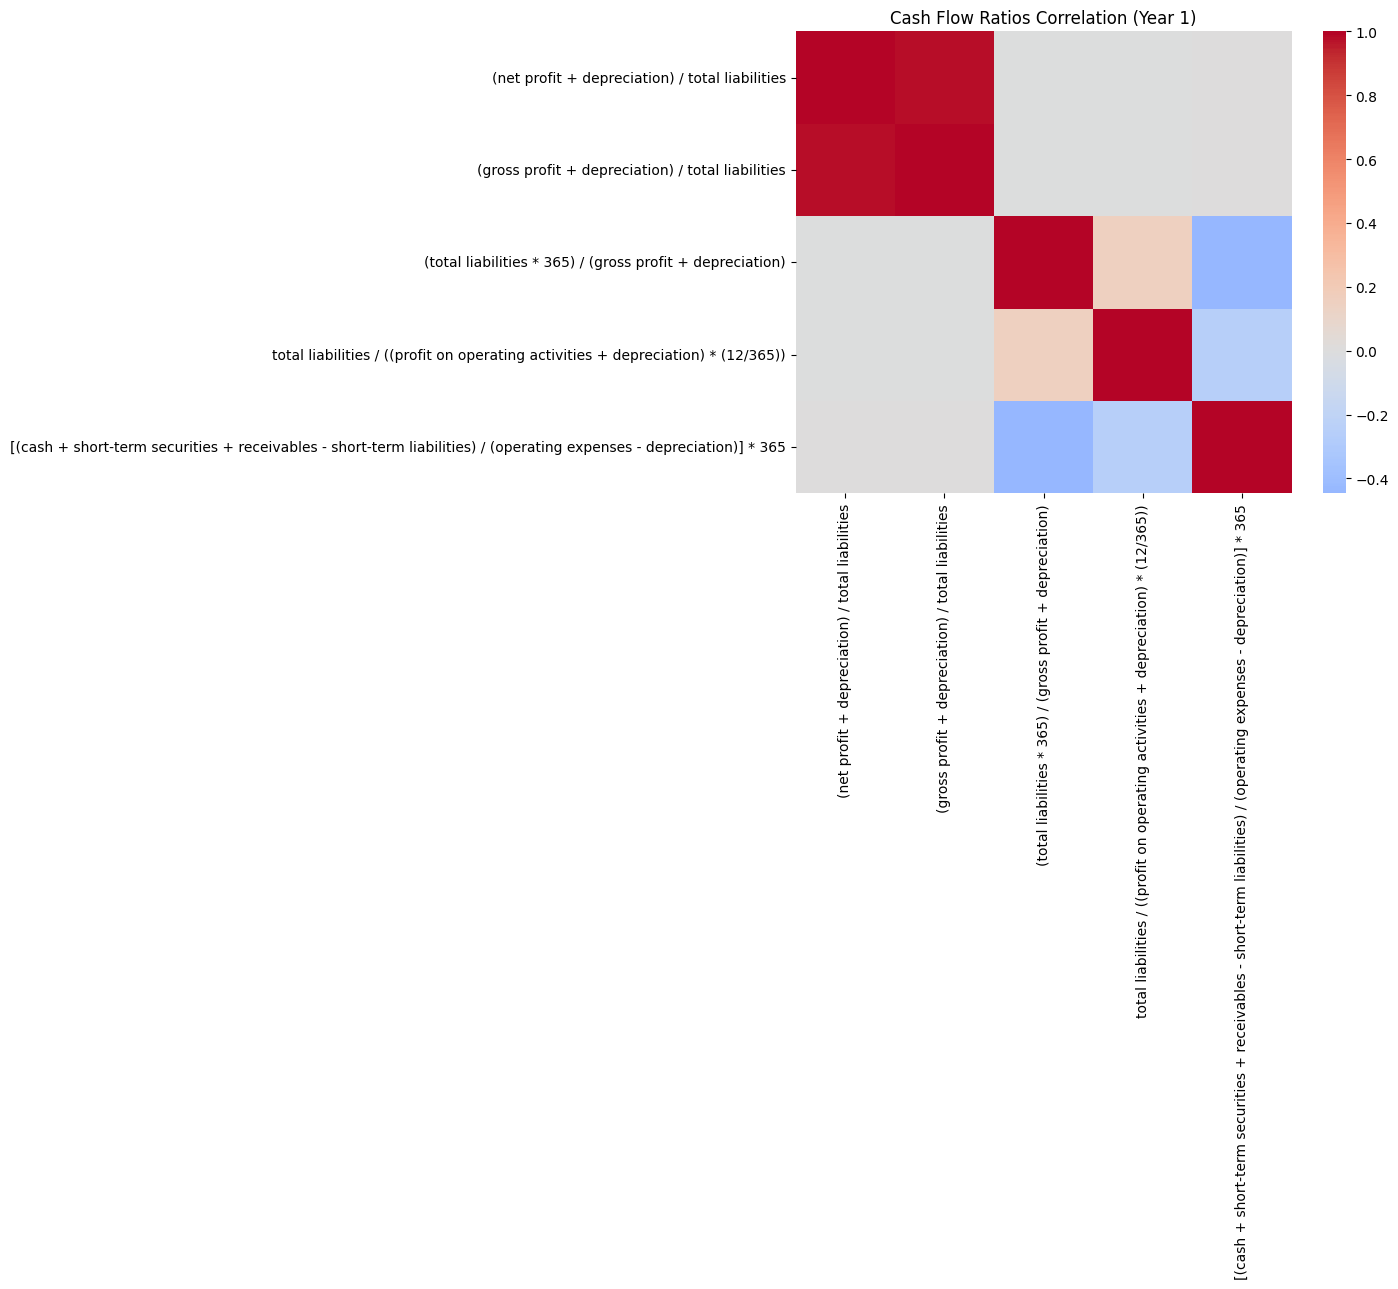

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(
    train1[cashflow_cols].corr(),
    cmap='coolwarm',
    center=0
)
plt.title("Cash Flow Ratios Correlation (Year 1)")
plt.tight_layout()
plt.show()


In [ ]:
for i, df in enumerate([train1, train2, train3, train4, train5], start=1):
    table = cashflow_negative_analysis(
        df,
        ['(net profit + depreciation) / total liabilities']
    )
    print(f"\nYear {i}")
    print(table[['ratio', 'difference']])



Year 1
                                             ratio  difference
0  (net profit + depreciation) / total liabilities    0.157015

Year 2
                                             ratio  difference
0  (net profit + depreciation) / total liabilities    0.119807

Year 3
                                             ratio  difference
0  (net profit + depreciation) / total liabilities    0.217362

Year 4
                                             ratio  difference
0  (net profit + depreciation) / total liabilities    0.290832

Year 5
                                             ratio  difference
0  (net profit + depreciation) / total liabilities    0.454368


#feature selection

In [ ]:
selected_features = [
    # Profitability
    'net profit / total assets',
    'EBIT / total assets',
    'EBITDA (profit on operating activities - depreciation) / total assets',

    # Liquidity
    'current assets / short-term liabilities',
    '(current assets - inventory) / short-term liabilities',
    'working capital / total assets',
    'working capital / fixed assets',

    # Cash flow
    '(net profit + depreciation) / total liabilities',
    '(gross profit + depreciation) / total liabilities',
    '(total liabilities * 365) / (gross profit + depreciation)',

    # Leverage
    'total liabilities / total assets',
    'equity / total assets',

    # Size
    'logarithm of total assets'
]


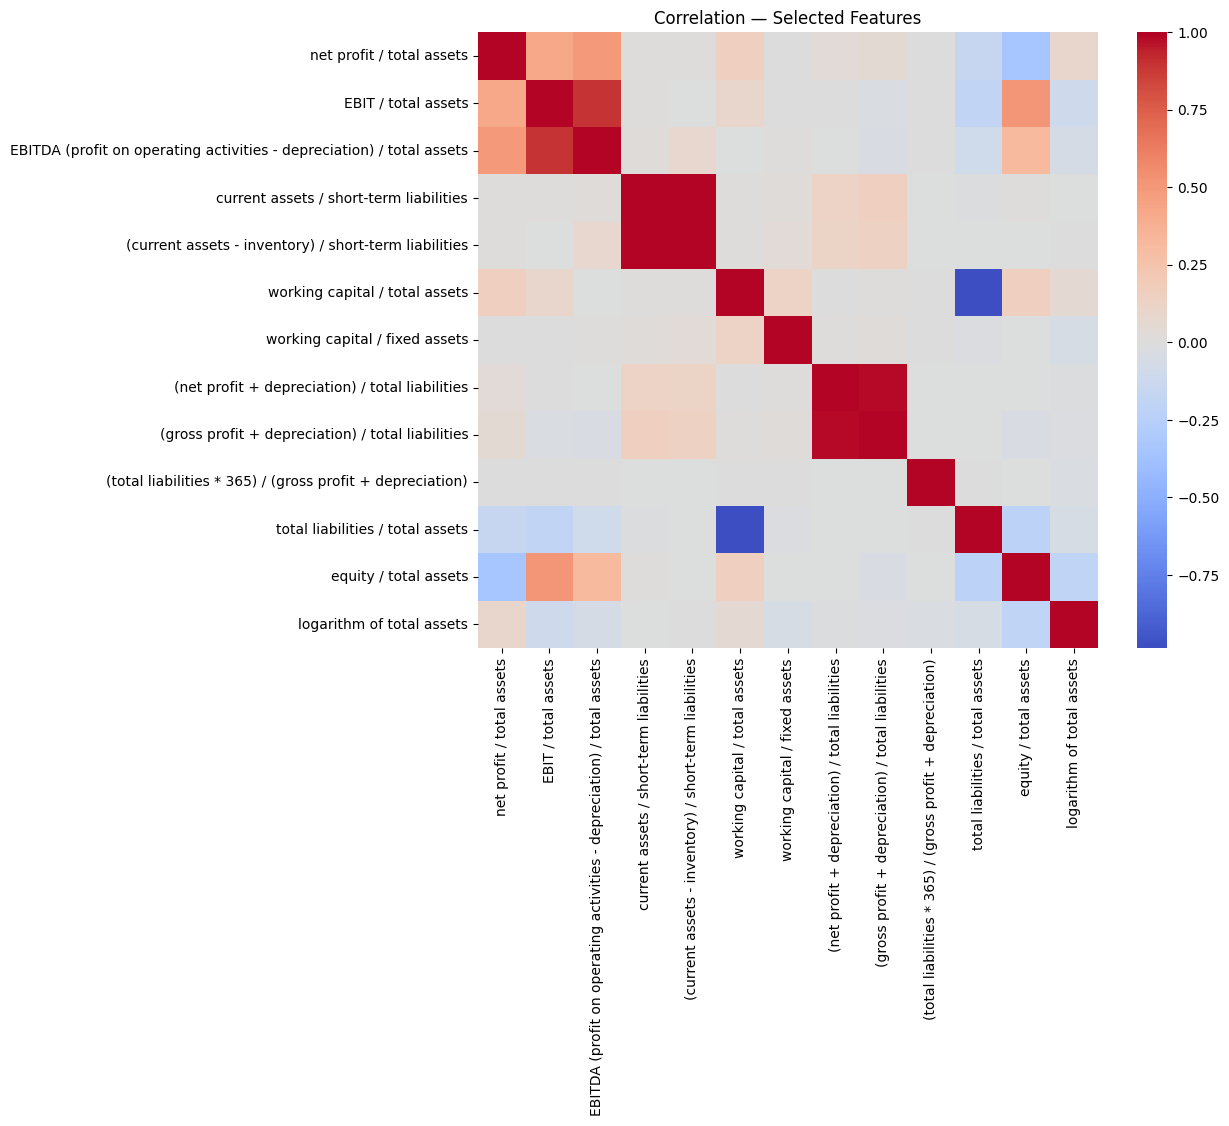

In [ ]:

corr = train1[selected_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation — Selected Features")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = train1[selected_features]
y = train1['class']

tree = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=50,
    random_state=42
)
tree.fit(X, y)

importances = pd.Series(
    tree.feature_importances_,
    index=selected_features
).sort_values(ascending=False)

importances


,0
(current assets - inventory) / short-term liabilities,0.432116
(net profit + depreciation) / total liabilities,0.235018
EBITDA (profit on operating activities - depreciation) / total assets,0.103165
(gross profit + depreciation) / total liabilities,0.100245
working capital / fixed assets,0.077609
net profit / total assets,0.037475
logarithm of total assets,0.014373
current assets / short-term liabilities,0.000000
EBIT / total assets,0.000000
working capital / total assets,0.000000


#model building

In [ ]:
features = [
    '(current assets - inventory) / short-term liabilities',
    '(net profit + depreciation) / total liabilities',
    '(gross profit + depreciation) / total liabilities',
    'EBITDA (profit on operating activities - depreciation) / total assets',
    'working capital / fixed assets',
    'net profit / total assets',
    'total liabilities / total assets',
    'logarithm of total assets'
]


In [ ]:
y = train1['class']


## Logistic Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = train1[features]
y = train1['class']

logit_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        penalty='l2',
        C=1.0,
        solver='liblinear',
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ))
])

logit_pipeline.fit(X, y)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42, solver='liblinear'))])

In [ ]:
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix
)

y_pred = logit_pipeline.predict(X)
y_proba = logit_pipeline.predict_proba(X)[:, 1]


In [ ]:
print(classification_report(y, y_pred, digits=3))
print("ROC AUC:", roc_auc_score(y, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))


              precision    recall  f1-score   support

           0      0.976     0.640     0.773      6756
           1      0.064     0.613     0.116       271

    accuracy                          0.639      7027
   macro avg      0.520     0.626     0.445      7027
weighted avg      0.941     0.639     0.748      7027

ROC AUC: 0.6698716898359036
Confusion Matrix:
 [[4325 2431]
 [ 105  166]]


In [ ]:
import pandas as pd
import numpy as np

coef = logit_pipeline.named_steps['model'].coef_[0]

coef_df = pd.DataFrame({
    'feature': features,
    'coefficient': coef,
    'odds_ratio': np.exp(coef)
}).sort_values(by='coefficient', ascending=False)

coef_df


,feature,coefficient,odds_ratio
6,total liabilities / total assets,6.934045,1026.638840
2,(gross profit + depreciation) / total liabilities,1.004954,2.731780
0,(current assets - inventory) / short-term liab...,0.207315,1.230371
5,net profit / total assets,0.027392,1.027771
3,EBITDA (profit on operating activities - depre...,-0.036883,0.963789
7,logarithm of total assets,-0.190487,0.826557
4,working capital / fixed assets,-0.232955,0.792190
1,(net profit + depreciation) / total liabilities,-1.996828,0.135765


In [ ]:
def evaluate_on_year(df, model, features):
    X = df[features]
    y = df['class']

    y_proba = model.predict_proba(X)[:, 1]
    y_pred = (y_proba >= 0.5).astype(int)

    return {
        'roc_auc': roc_auc_score(y, y_proba),
        'recall_bankrupt': (
            ((y == 1) & (y_pred == 1)).sum() / (y == 1).sum()
        )
    }

for i, df in enumerate([train2, train3, train4, train5], start=2):
    metrics = evaluate_on_year(df, logit_pipeline, features)
    print(f"Year {i}:", metrics)


Year 2: {'roc_auc': np.float64(0.6291782206077969), 'recall_bankrupt': np.float64(0.62)}
Year 3: {'roc_auc': np.float64(0.6690638398372211), 'recall_bankrupt': np.float64(0.6646464646464646)}
Year 4: {'roc_auc': np.float64(0.6836853016804268), 'recall_bankrupt': np.float64(0.6757281553398058)}
Year 5: {'roc_auc': np.float64(0.7677439024390244), 'recall_bankrupt': np.float64(0.7146341463414634)}


In [ ]:
import pandas as pd
from sklearn.metrics import roc_auc_score

def temporal_roc_auc(model, dfs, features, year_labels):
    results = []

    for df, year in zip(dfs, year_labels):
        X = df[features]
        y = df['class']

        y_proba = model.predict_proba(X)[:, 1]
        roc = roc_auc_score(y, y_proba)

        results.append({
            'years_before_bankruptcy': year,
            'roc_auc': roc
        })

    return pd.DataFrame(results)


In [ ]:
dfs = [train1, train2, train3, train4, train5]
year_labels = [1, 2, 3, 4, 5]

temporal_results = temporal_roc_auc(
    logit_pipeline,
    dfs,
    features,
    year_labels
)

temporal_results


,years_before_bankruptcy,roc_auc
0,1,0.669872
1,2,0.629178
2,3,0.669064
3,4,0.683685
4,5,0.767744


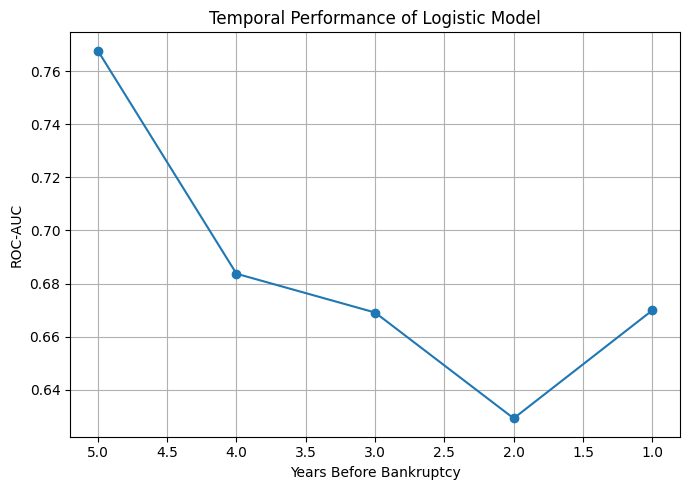

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(
    temporal_results['years_before_bankruptcy'],
    temporal_results['roc_auc'],
    marker='o'
)

plt.gca().invert_xaxis()
plt.xlabel("Years Before Bankruptcy")
plt.ylabel("ROC-AUC")
plt.title("Temporal Performance of Logistic Model")

plt.grid(True)
plt.tight_layout()
plt.show()


## decision tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=50,
    class_weight='balanced',
    random_state=42
)

dt_model.fit(train1[features], train1['class'])


DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=50, random_state=42)

In [ ]:
from sklearn.metrics import roc_auc_score

def temporal_eval(model, dfs, features):
    results = []
    for i, df in enumerate(dfs, start=1):
        X = df[features]
        y = df['class']
        y_proba = model.predict_proba(X)[:, 1]
        roc = roc_auc_score(y, y_proba)
        results.append({
            'years_before_bankruptcy': i,
            'roc_auc': roc
        })
    return pd.DataFrame(results)


In [ ]:
dt_results = temporal_eval(
    dt_model,
    [train1, train2, train3, train4, train5],
    features
)

dt_results


,years_before_bankruptcy,roc_auc
0,1,0.774571
1,2,0.668755
2,3,0.714136
3,4,0.741871
4,5,0.805067


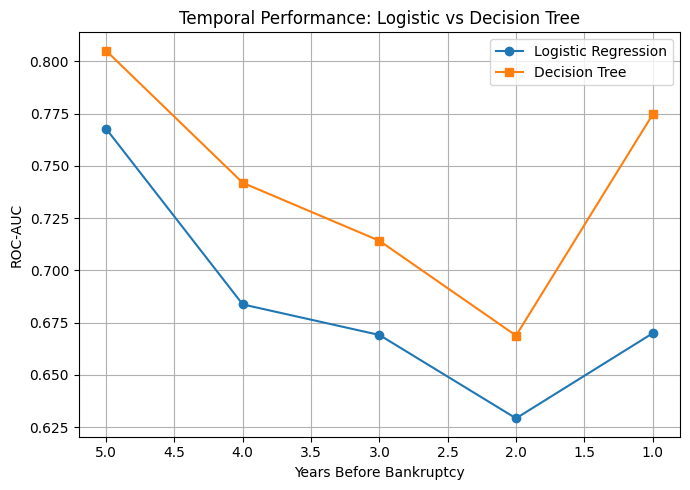

In [ ]:
plt.figure(figsize=(7,5))

plt.plot(
    temporal_results['years_before_bankruptcy'],
    temporal_results['roc_auc'],
    marker='o',
    label='Logistic Regression'
)

plt.plot(
    dt_results['years_before_bankruptcy'],
    dt_results['roc_auc'],
    marker='s',
    label='Decision Tree'
)

plt.gca().invert_xaxis()
plt.xlabel("Years Before Bankruptcy")
plt.ylabel("ROC-AUC")
plt.title("Temporal Performance: Logistic vs Decision Tree")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_leaf=30,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(train1[features], train1['class'])


RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=30, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [ ]:
rf_results = temporal_eval(
    rf_model,
    [train1, train2, train3, train4, train5],
    features
)

rf_results


,years_before_bankruptcy,roc_auc
0,1,0.879665
1,2,0.705207
2,3,0.747386
3,4,0.773541
4,5,0.833077


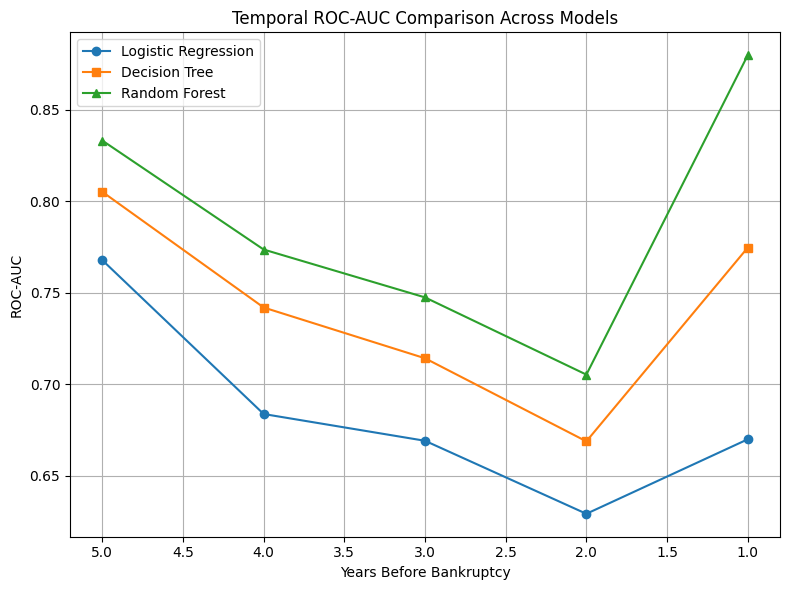

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(
    temporal_results['years_before_bankruptcy'],
    temporal_results['roc_auc'],
    marker='o',
    label='Logistic Regression'
)

plt.plot(
    dt_results['years_before_bankruptcy'],
    dt_results['roc_auc'],
    marker='s',
    label='Decision Tree'
)

plt.plot(
    rf_results['years_before_bankruptcy'],
    rf_results['roc_auc'],
    marker='^',
    label='Random Forest'
)

plt.gca().invert_xaxis()
plt.xlabel("Years Before Bankruptcy")
plt.ylabel("ROC-AUC")
plt.title("Temporal ROC-AUC Comparison Across Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Conclusion

This project developed an **Early Warning System (EWS)** for corporate bankruptcy using the Polish Companies Bankruptcy Dataset, with a focus on **time-aware prediction** rather than a single static classification.

Category-wise exploratory data analysis showed that financial distress is driven by the combined deterioration of **liquidity, cash-flow, profitability, and leverage**, with liquidity and cash-flow indicators acting as the strongest early-warning signals.

A compact and interpretable feature set was constructed using financial intuition, EDA insights, and model-based importance, avoiding redundant ratios and unnecessary feature engineering.

Temporal evaluation across **1 to 5 years before bankruptcy** revealed that model performance is horizon-dependent:
- **Logistic Regression** captures early structural risk and performs better at longer horizons.
- **Decision Trees** capture nonlinear crisis-stage behavior closer to bankruptcy.
- **Random Forest** consistently achieves the best performance across all horizons by modeling interactions between financial indicators.

Overall, the results highlight that bankruptcy prediction is a **temporal risk assessment problem**, and effective early warning systems must combine financial reasoning with time-aware machine learning models.
